**Preprocessing**

In [34]:
# Yippee
#Removing teacher quality and previous scores from the dataset. 
#Feature engineering, combining features like grade/hour studied.
#Categorical variables with natural ordering, like low-med-high are encoded into ordinal variables, 1, 2, 3. 
#Boolean values are converted into 0 1 for yes no.
#Other features such as school type are one hot encoded.


#Import libraries
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming file is in the same directory, import data.
dataf = pd.read_csv("StudentPerformanceFactors.csv")

#Remove Teacher quality, previous scores, and Distance from home, since they are either subjective or not useful.
#[Teacher_Quality], [Previous_Scores], [Distance_from_Home]
dataf = dataf.drop(labels=["Teacher_Quality","Previous_Scores","Distance_from_Home", "Peer_Influence"], axis=1)

# Ordinal Label Encoding Low --> 1, Medium --> 2, High --> 3
mapper = {"Low":1, "Medium":2, "High":3}
dataf["Parental_Involvement"] = dataf["Parental_Involvement"].map(mapper)
dataf["Access_to_Resources"] = dataf["Access_to_Resources"].map(mapper)
dataf["Family_Income"] = dataf["Family_Income"].map(mapper)
dataf["Motivation_Level"] = dataf["Motivation_Level"].map(mapper)

#Encode Boolean values into binary currently 1 for yes, 0 for no. Can change depending on how we want it.
mapper = {"Yes":1, "No":0}
dataf["Extracurricular_Activities"] = dataf["Extracurricular_Activities"].map(mapper)
dataf["Internet_Access"] = dataf["Internet_Access"].map(mapper)
dataf["Learning_Disabilities"] = dataf["Learning_Disabilities"].map(mapper)

# One-hot encoding, for School_Type, Peer_Incluence, Parental_Education_Level. True = 1, False = 0.
columns_to_dummy = ['Parental_Education_Level', 'School_Type', 'Gender']
dataf = pd.get_dummies(dataf, columns=columns_to_dummy)

# Custom interaction terms
dataf['Study_Per_Motivation'] = dataf['Hours_Studied'] * dataf['Motivation_Level']
dataf['Attendance_Per_Motivation'] = dataf['Attendance'] * dataf['Motivation_Level']
dataf['Study_Per_Attendance'] = dataf['Hours_Studied'] * dataf['Attendance']

dataf['Study_Per_Parental_Involvement'] = dataf['Hours_Studied'] * dataf['Parental_Involvement']
dataf['Attendance_Per_Parental_Involvement'] = dataf['Attendance'] * dataf['Parental_Involvement']

dataf['Study_Per_Resource_Access'] = dataf['Hours_Studied'] * dataf['Access_to_Resources']

#Normalization
# Assuming 'dataf' is your DataFrame
scaler = MinMaxScaler()


# Apply normalization (scaling between 0 and 1) to all columns
dataf_normalized = scaler.fit_transform(dataf)

# Convert back to a DataFrame
dataf = pd.DataFrame(dataf_normalized, columns=dataf.columns)

# Splitting the data into 60/20/20 for train/validate/test.
# Split into training (60%) and remaining (40%)
train_data, temp_data = train_test_split(dataf, test_size=0.4, random_state=42)

# Split remaining 40% into validation (20%) and test (20%)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Separate Target Variable
X = dataf.drop(columns=['Exam_Score'])
y = dataf['Exam_Score']

X_train = train_data.drop(columns=['Exam_Score'])
y_train = train_data['Exam_Score']

X_val = val_data.drop(columns=['Exam_Score'])
y_val = val_data['Exam_Score']

X_test = test_data.drop(columns=['Exam_Score'])
y_test = test_data['Exam_Score']

dataf
print((dataf['Exam_Score'] < 0.5).sum())

6552


**Visualizing data**

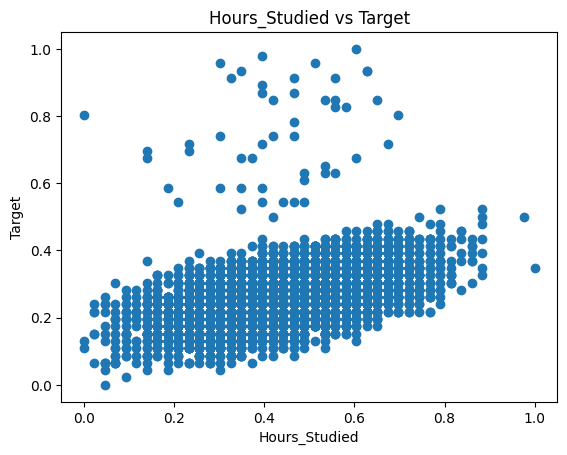

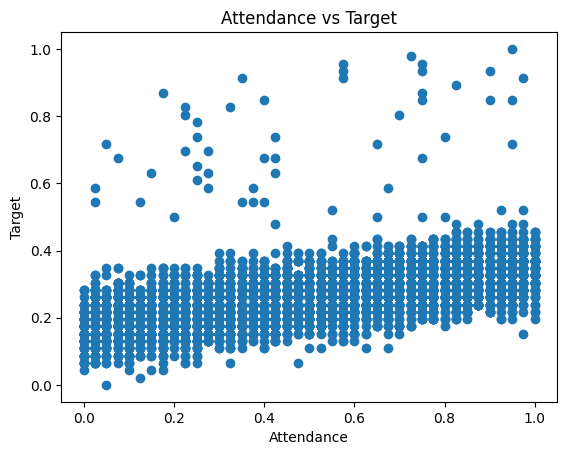

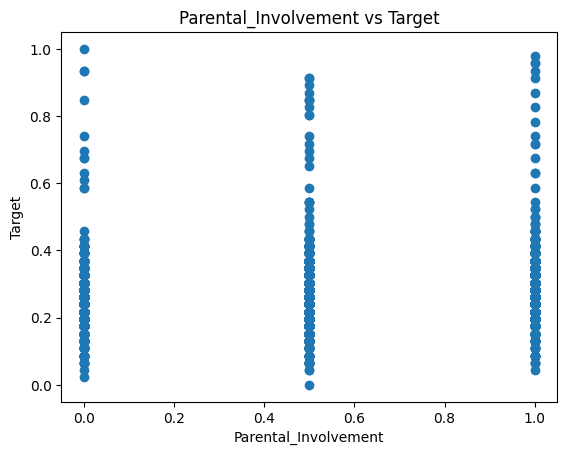

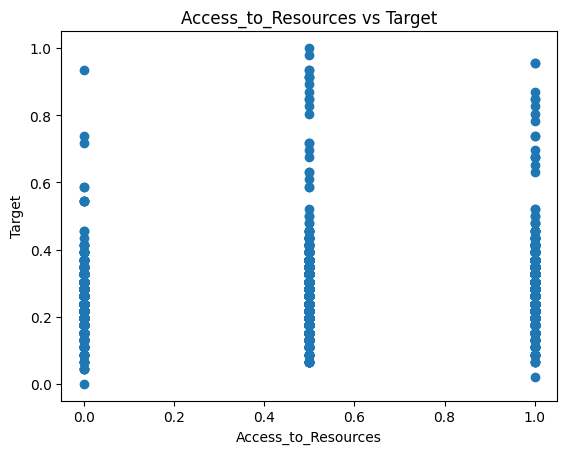

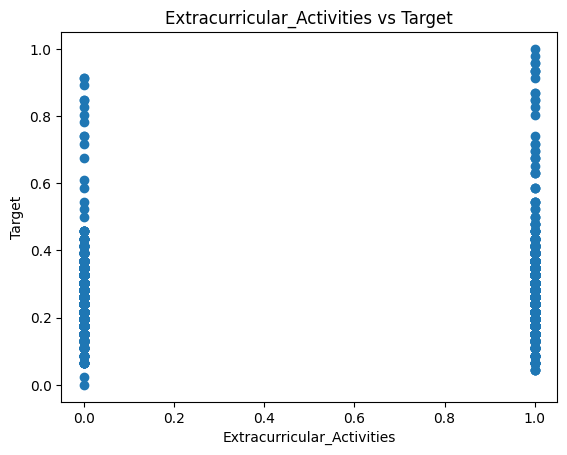

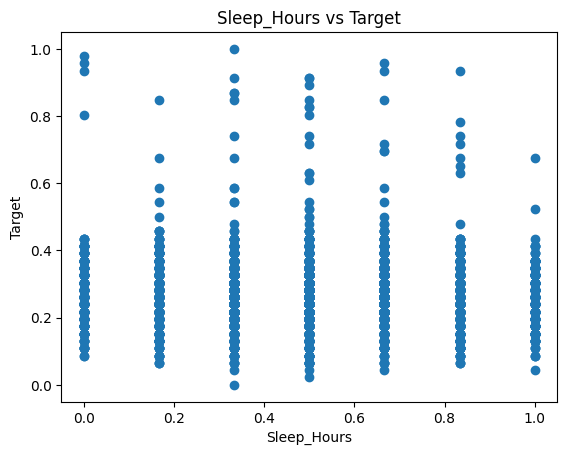

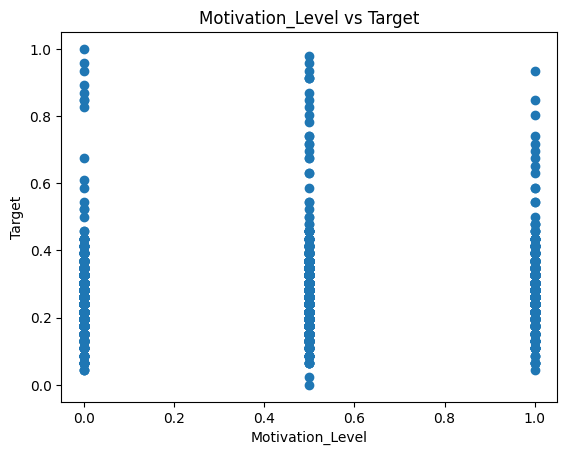

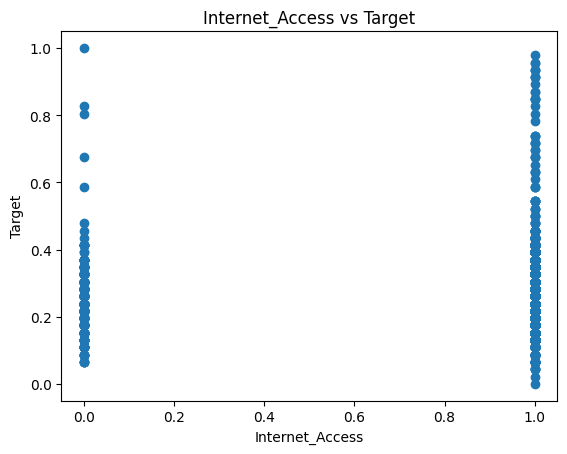

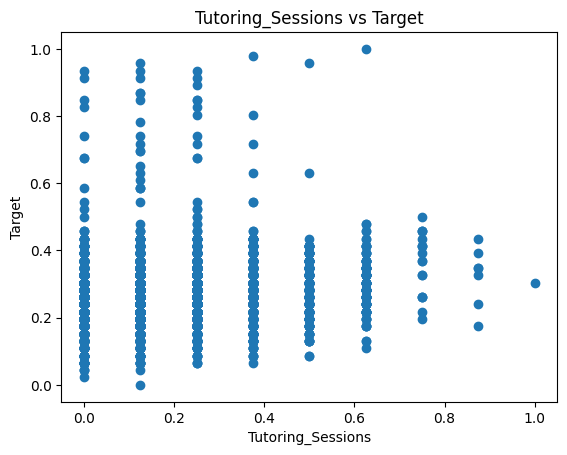

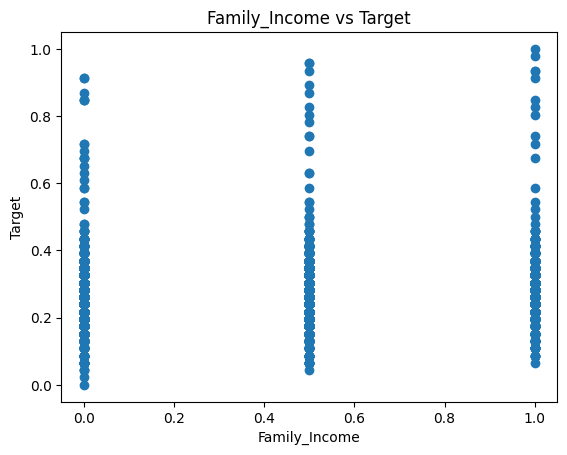

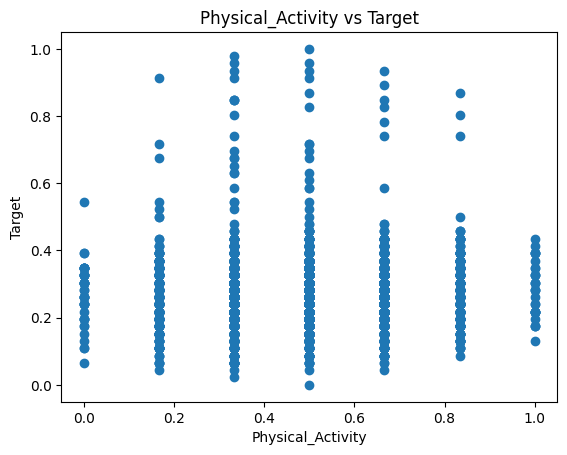

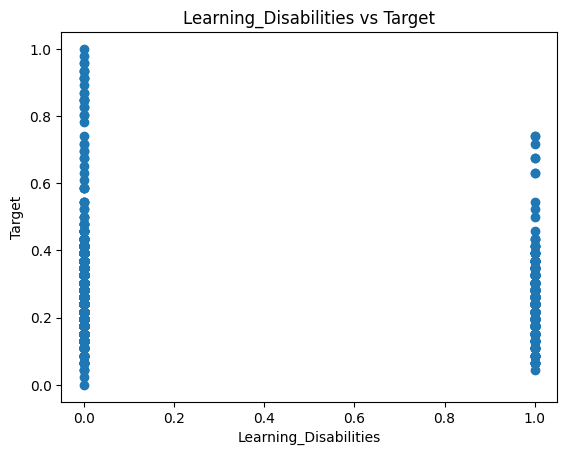

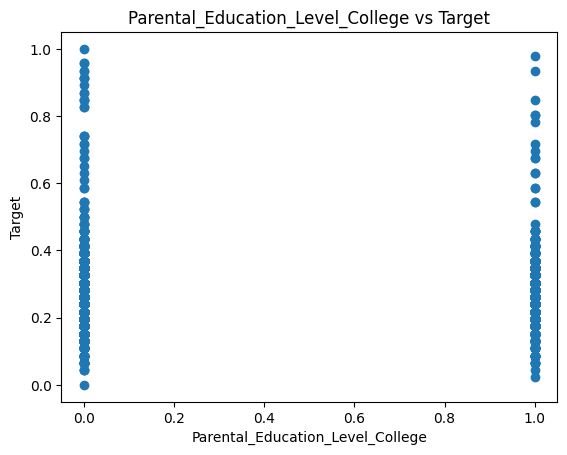

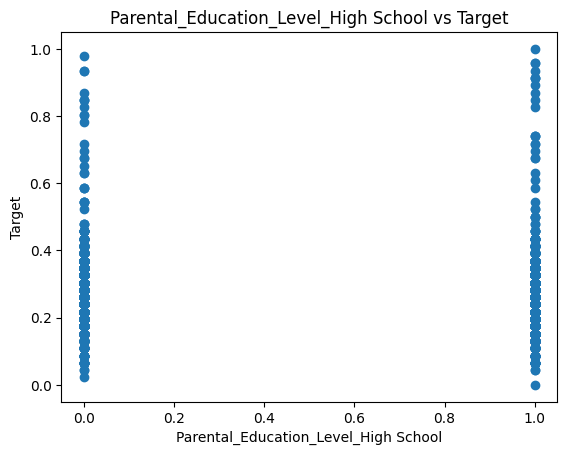

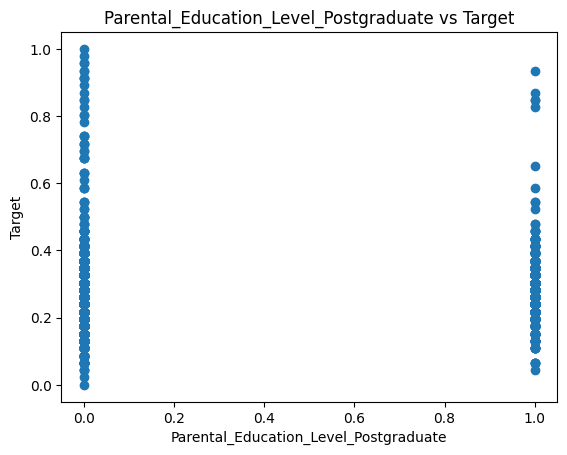

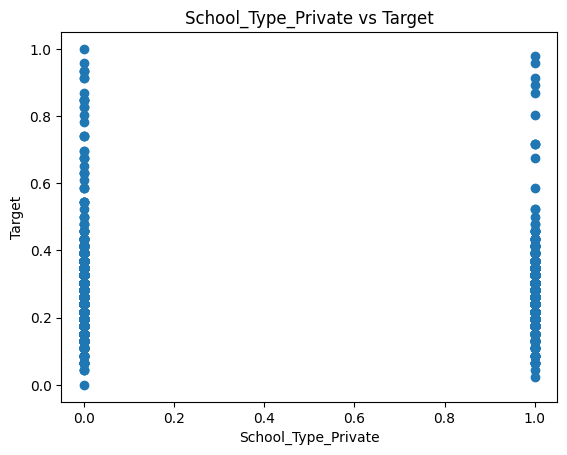

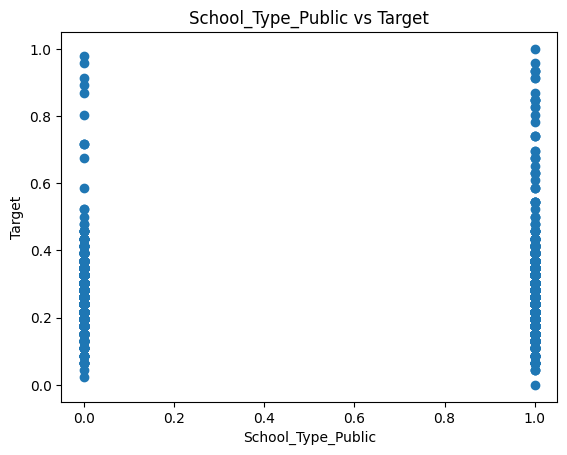

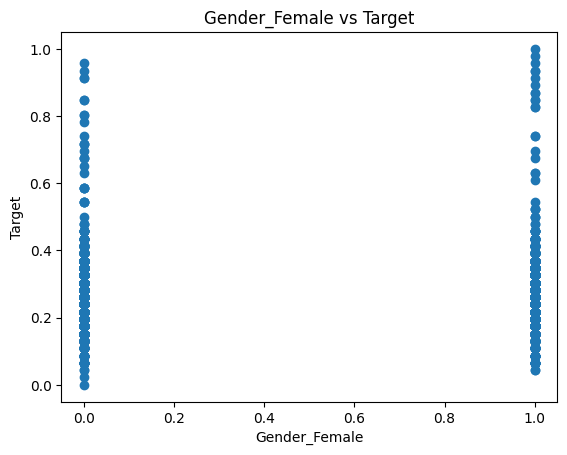

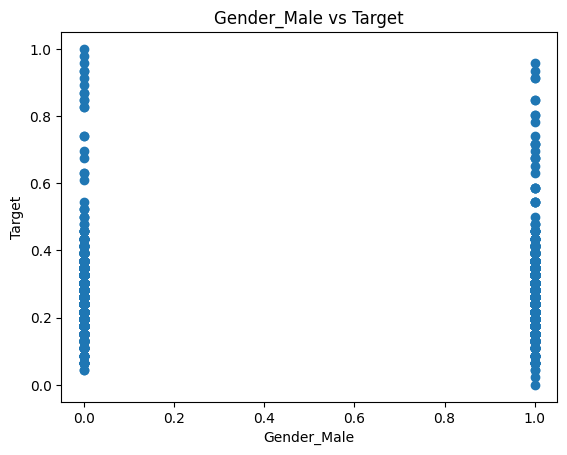

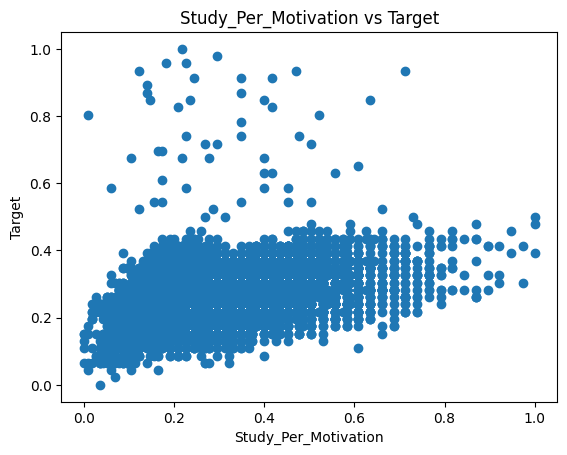

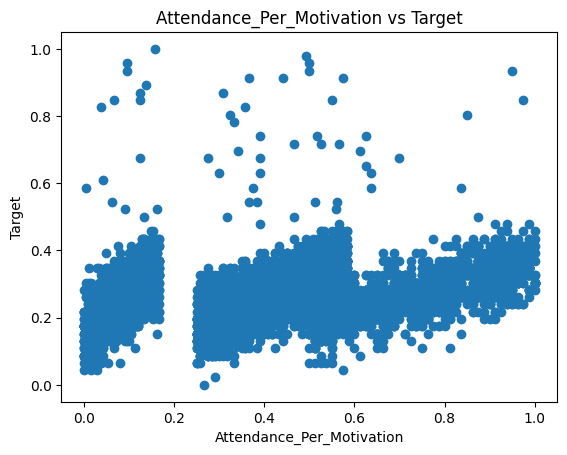

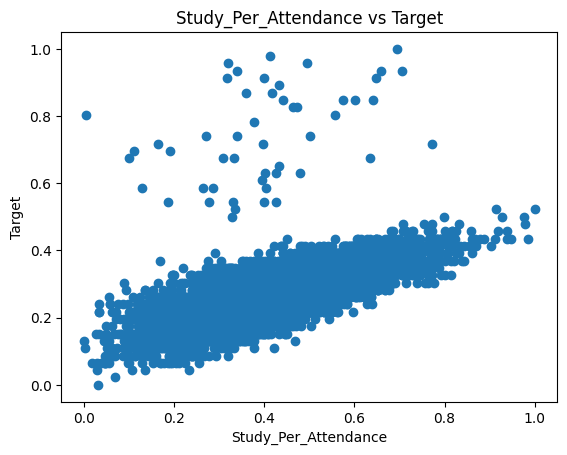

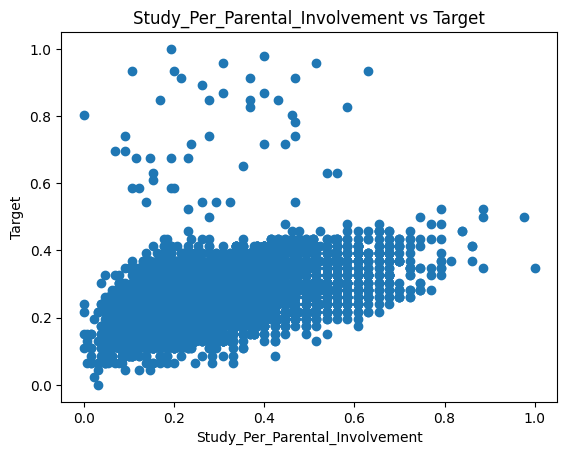

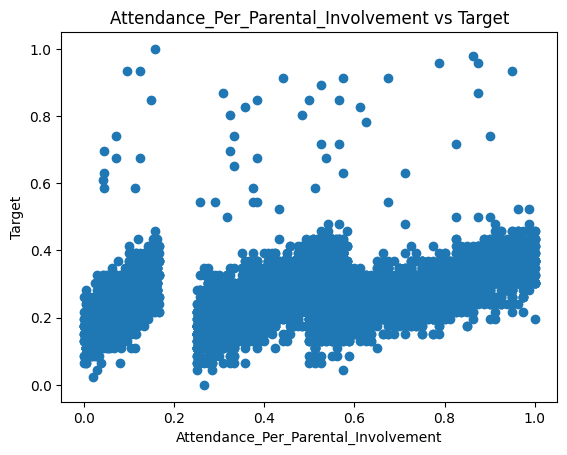

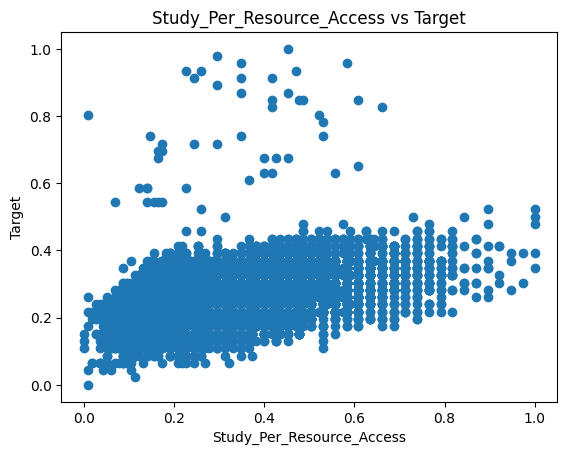

In [2]:

import matplotlib.pyplot as plt

for column in X.columns:
    plt.scatter(X[column], y)
    plt.title(f'{column} vs Target')
    plt.xlabel(column)
    plt.ylabel('Target')
    plt.show()

**Training and Validation**

RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

tree_model = RandomForestRegressor(n_estimators=1000, max_depth = None, min_samples_split=2, min_samples_leaf= 5, random_state=42)
tree_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=5, n_estimators=1000, random_state=42)

In [15]:
print("Training")
y_train_pred = tree_model.predict(X_train)
# Calculate evaluation metrics
mse_val = mean_squared_error(y_train, y_train_pred)
r2_val = r2_score(y_train, y_train_pred)
mae_val = mean_absolute_error(y_train, y_train_pred)

print(f"Training MSE: {mse_val}")
print(f"Training R²: {r2_val}")
print(f"Training MAE: {mae_val}")

print("Validation")
# Predict the target on the validation data
y_val_pred = tree_model.predict(X_val)

# Calculate evaluation metrics
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

print(f"Validation MSE: {mse_val}")
print(f"Validation R²: {r2_val}")
print(f"Validation MAE: {mae_val}")



Training
Training MSE: 0.0017853960141418375
Training R²: 0.7624313177459573
Training MAE: 0.018455056361157775
Validation
Validation MSE: 0.0020631863365352865
Validation R²: 0.6787232527360505
Validation MAE: 0.02438078951792715


In [5]:

from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor(hidden_layer_sizes=(104, 52, 26), activation='relu', max_iter=1000)
nn_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(104, 52, 26), max_iter=1000)

In [13]:
print("Training")
y_train_pred = nn_model.predict(X_train)
# Calculate evaluation metrics
mse_val = mean_squared_error(y_train, y_train_pred)
r2_val = r2_score(y_train, y_train_pred)
mae_val = mean_absolute_error(y_train, y_train_pred)

print(f"Training MSE: {mse_val}")
print(f"Training R²: {r2_val}")
print(f"Training MAE: {mae_val}")


print("Validation")
# Predict the target on the validation data
y_val_pred = nn_model.predict(X_val)

# Calculate evaluation metrics
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

print(f"Validation MSE: {mse_val}")
print(f"Validation R²: {r2_val}")
print(f"Validation MAE: {mae_val}")


Training
Training MSE: 0.0024449580180302506
Training R²: 0.674668560975202
Training MAE: 0.02396696420979142
Validation
Validation MSE: 0.002057145908750801
Validation R²: 0.6796638604535005
Validation MAE: 0.024877500160073018


In [7]:
from sklearn.linear_model import LinearRegression

linreg_model = LinearRegression().fit(X_train, y_train)

In [14]:
print("Training")
y_train_pred = linreg_model.predict(X_train)
# Calculate evaluation metrics
mse_val = mean_squared_error(y_train, y_train_pred)
r2_val = r2_score(y_train, y_train_pred)
mae_val = mean_absolute_error(y_train, y_train_pred)

print(f"Training MSE: {mse_val}")
print(f"Training R²: {r2_val}")
print(f"Training MAE: {mae_val}")

print("Validation")
# Predict the target on the validation data
y_val_pred = linreg_model.predict(X_val)

# Calculate evaluation metrics
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

print(f"Validation MSE: {mse_val}")
print(f"Validation R²: {r2_val}")
print(f"Validation MAE: {mae_val}")


Training
Training MSE: 0.0025916798944568167
Training R²: 0.6551454285360083
Training MAE: 0.02165554721416165
Validation
Validation MSE: 0.0017673602880478364
Validation R²: 0.7247889080435588
Validation MAE: 0.020188100762575163


**Against Test Data**

Forest
Testing MSE: 0.0024502186681497947
Testing R²: 0.6388661916139086
Testing MAE: 0.026169964595880477


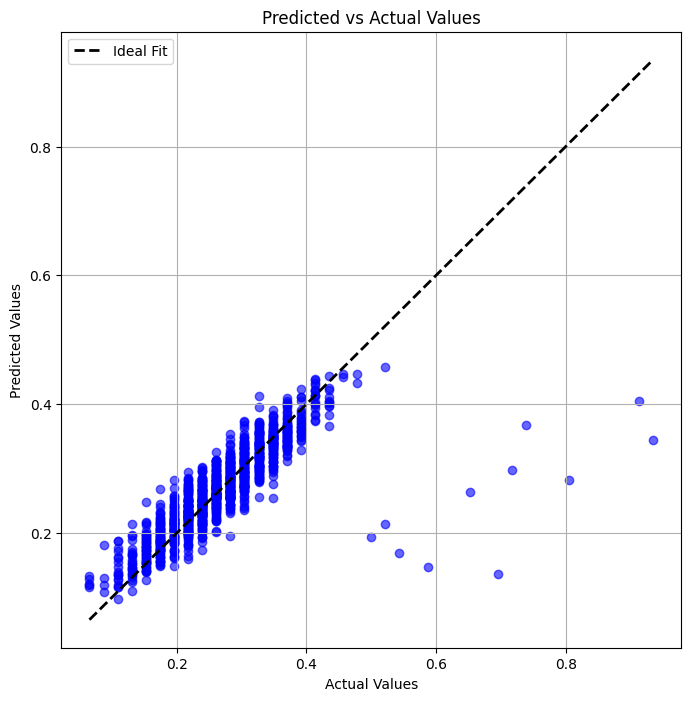

In [22]:
print("Forest")
y_test_pred = tree_model.predict(X_test)
# Calculate evaluation metrics
mse_val = mean_squared_error(y_test, y_test_pred)
r2_val = r2_score(y_test, y_test_pred)
mae_val = mean_absolute_error(y_test, y_test_pred)

print(f"Testing MSE: {mse_val}")
print(f"Testing R²: {r2_val}")
print(f"Testing MAE: {mae_val}")


# Create the scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Fit")  # 45-degree line

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()




NN
Testing MSE: 0.0024494300523431258
Testing R²: 0.6389824244356228
Testing MAE: 0.02615931891104717


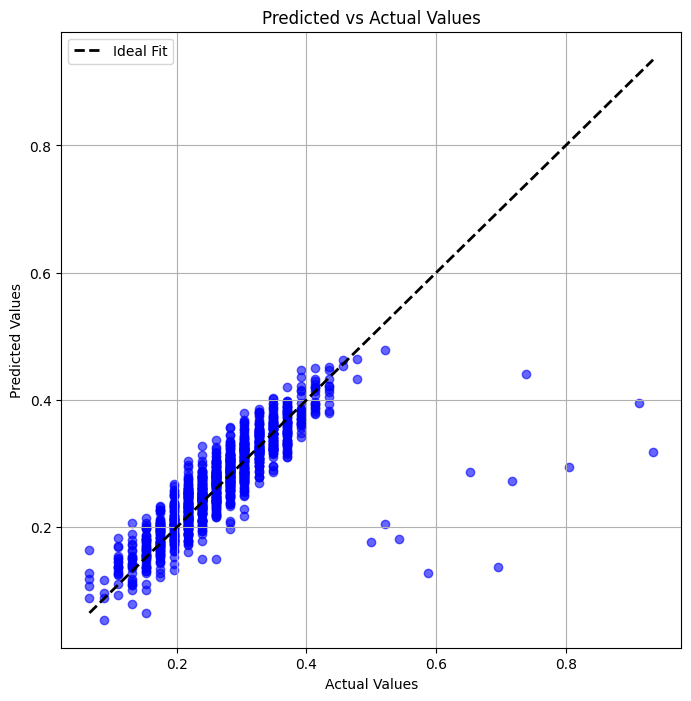

In [23]:

print("NN")
# Predict the target on the validation data
y_test_pred = nn_model.predict(X_test)
# Calculate evaluation metrics
mse_val = mean_squared_error(y_test, y_test_pred)
r2_val = r2_score(y_test, y_test_pred)
mae_val = mean_absolute_error(y_test, y_test_pred)

print(f"Testing MSE: {mse_val}")
print(f"Testing R²: {r2_val}")
print(f"Testing MAE: {mae_val}")


# Create the scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Fit")  # 45-degree line

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Linear Regression
Testing MSE: 0.002185030426124495
Testing R²: 0.6779518622222896
Testing MAE: 0.021555173113981294


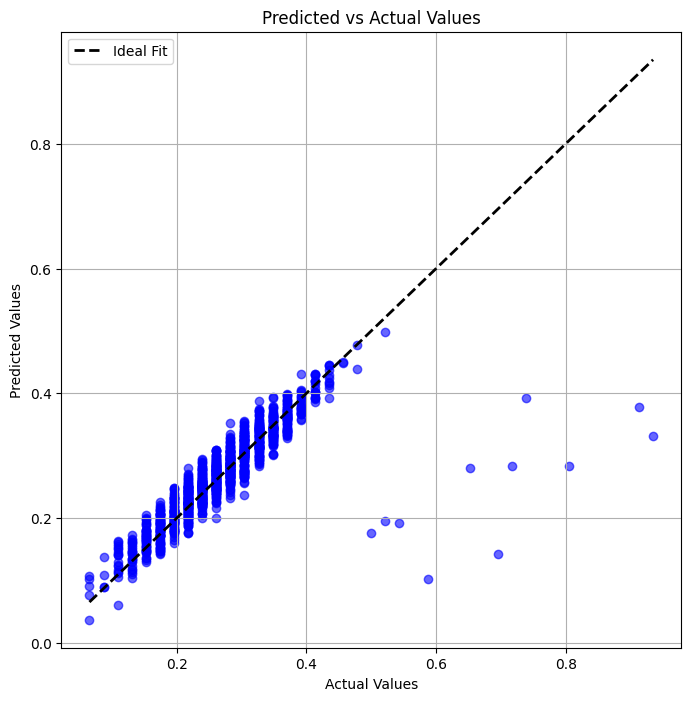

In [24]:
print("Linear Regression")
# Predict the target on the validation data
y_test_pred = linreg_model.predict(X_test)
# Calculate evaluation metrics
mse_val = mean_squared_error(y_test, y_test_pred)
r2_val = r2_score(y_test, y_test_pred)
mae_val = mean_absolute_error(y_test, y_test_pred)

print(f"Testing MSE: {mse_val}")
print(f"Testing R²: {r2_val}")
print(f"Testing MAE: {mae_val}")

# Create the scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Fit")  # 45-degree line

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
